Welcome to Week 4!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles. ![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access the [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine.

Before we start - we have to use Python2 (not Python 3), so we should choose this as an option in "Runtime" -> "Change Runtime Type" at the top.

In [56]:
#we are going to make a directory called APPS
!mkdir -p APPS
#Now we move to our directory called APPS and we download ROOT from the CERN server, this version is chosen because it runs on this machine - if you want to run this locally check the versions!
!cd APPS && wget https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz 
#Now we extract our downloaded file:
!cd APPS && tar -xf root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz


--2020-03-09 17:44:59--  https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz
Resolving root.cern.ch (root.cern.ch)... 137.138.13.143, 2001:1458:201:45::100:b
Connecting to root.cern.ch (root.cern.ch)|137.138.13.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137415272 (131M) [application/x-gzip]
Saving to: ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz.6’

root_v6.13.08.Linux 100%[===================>] 131.05M  10.9MB/s    in 14s     

2020-03-09 17:45:15 (9.36 MB/s) - ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz.6’ saved [137415272/137415272]



In [57]:
#now we can extract some files from ROOT and ensure that we can access the libraries. We use some python key words to get access to the right files:

import sys

sys.path.append("/content/APPS/root/lib")

import ctypes

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libCore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libThread.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libImt.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libRIO.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libNet.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libTree.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMathCore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMatrix.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libHist.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf3d.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMultiProc.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMinuit.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libFoam.so')

<CDLL '/content/APPS/root/lib/libFoam.so', handle 560a4da2ef00 at 7f3cfabe0bd0>

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


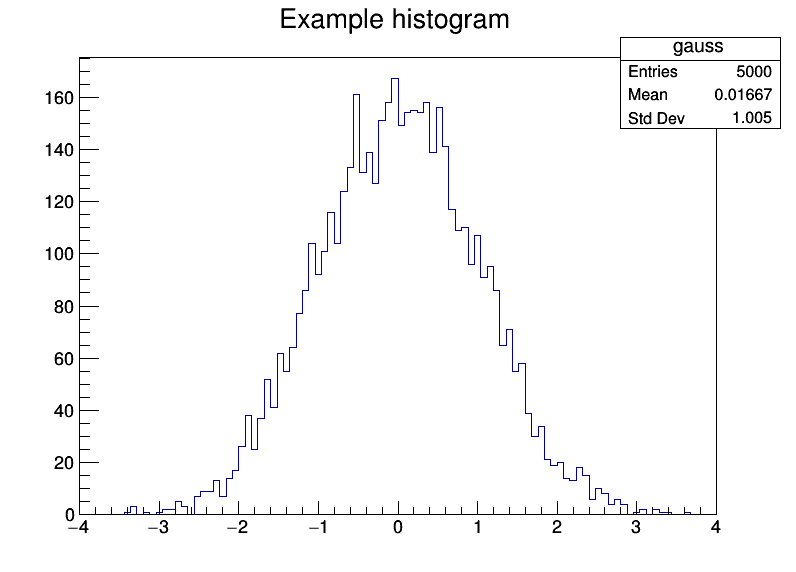

In [58]:
#Now we can check if we have everything working as we expect: 
#Import brings the ROOT framework into our python environment.
import ROOT
#We define a 1 dimensional histogram, with 100 bins which ranges from -4 to +4
h = ROOT.TH1F("gauss","Example histogram",100,-4,4)
#Fill the histogram with gaussian (random) distribution
h.FillRandom("gaus")
#make a Canvas (i.e. a drawing)
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#Draw my histogram
h.Draw()
#Show me the canvas
c.Draw()

All being well - this should give no errors and we should have some kind of Gaussian distribution above.

The next step is to get our data from CERN:

In [59]:
!mkdir -p DATA && cd DATA  && wget http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root

--2020-03-09 17:45:24--  http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root
Resolving opendata.cern.ch (opendata.cern.ch)... 188.185.82.144, 188.184.28.138, 188.184.93.89, ...
Connecting to opendata.cern.ch (opendata.cern.ch)|188.185.82.144|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444723234 (424M) [application/octet-stream]
Saving to: ‘B2HHH_MagnetUp.root.5’

B2HHH_MagnetUp.root 100%[===================>] 424.12M  10.9MB/s    in 42s     

2020-03-09 17:46:07 (10.1 MB/s) - ‘B2HHH_MagnetUp.root.5’ saved [444723234/444723234]



In [0]:
#Since we need to use ROOT, we must first import this into Python:
import ROOT
#Then we open the ROOT file using the TFile command.
f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")
#From our file, we have to extract the DecayTree 
tree=f.Get("DecayTree")
#Now we can grab some variables as a test:
# ymomentum = ROOT.RooRealVar("H1_PY","H1 Y Momentum",0,10000,"MeV/c")
# xmomentum = ROOT.RooRealVar("H1_PX","H1 X Momentum",0,10000,"MeV/c")
# zmomentum = ROOT.RooRealVar("H1_PZ","H1 Z Momentum",0,10000,"MeV/c")
# # We then create a dataset for us to play with
# data = ROOT.RooDataSet("data","data set", tree, ROOT.RooArgSet(xmomentum,ymomentum,zmomentum), "1==1")
# # Now we create a canvas, plot our data onto the canvas and draw it:
# c = ROOT.TCanvas("c","c")
# frame = xmomentum.frame()
# data.plotOn(frame)
# frame.Draw()
# c.Draw()

#Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce both particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are 524 [documented](http://pdg.lbl.gov/2014/listings/rpp2014-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon or a Pion), **not** the B-meson - the mother particle. We have to use some detective work to extract the information we need on the original physics process at play.


Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We need to first combine this into a single measurement

In [0]:
#We need to tell Python what the total momentum is defined as mathematically - do that in this code block:

#Hint: I suggest we define a function which we might want to use later - something like:

def p_tot_daughter(daughter):
  p_tot = "sqrt({}_PX**2 + {}_PY**2 + {}_PZ**2)".format(daughter, daughter, daughter)
  return p_tot


Now plot the total momentum for one (or more) of the daughter particles.

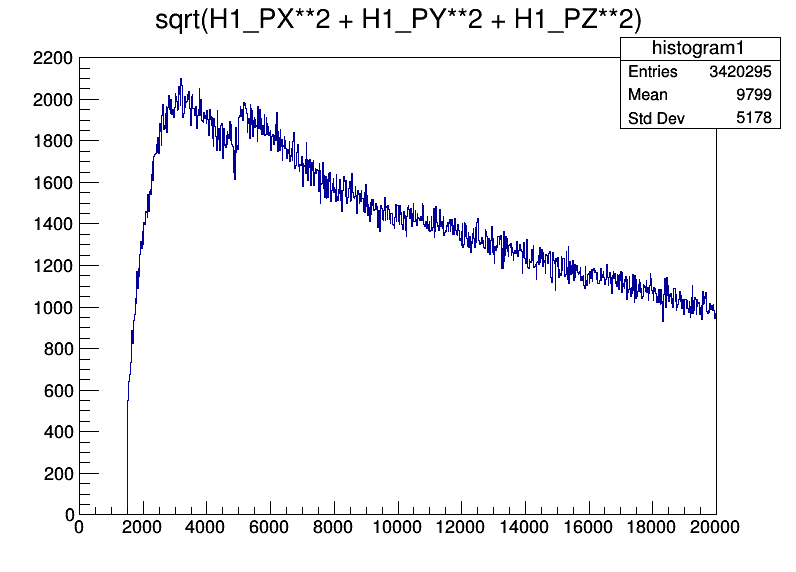

In [73]:
#use the histogram plotting tools, call your function to find the total momentum and then plot it!

tree.Draw(p_tot_daughter("H1") + ">>histogram1(1000,0,20000)")
histogram1 = ROOT.gDirectory.Get("histogram1")
#Show me the canvas
c.Draw()

The next step is to use the total momentum of the Kaon and its invarient mass (found with a small amount of research) and your relativity knowledge to get an equation for the energy of the Kaon. 

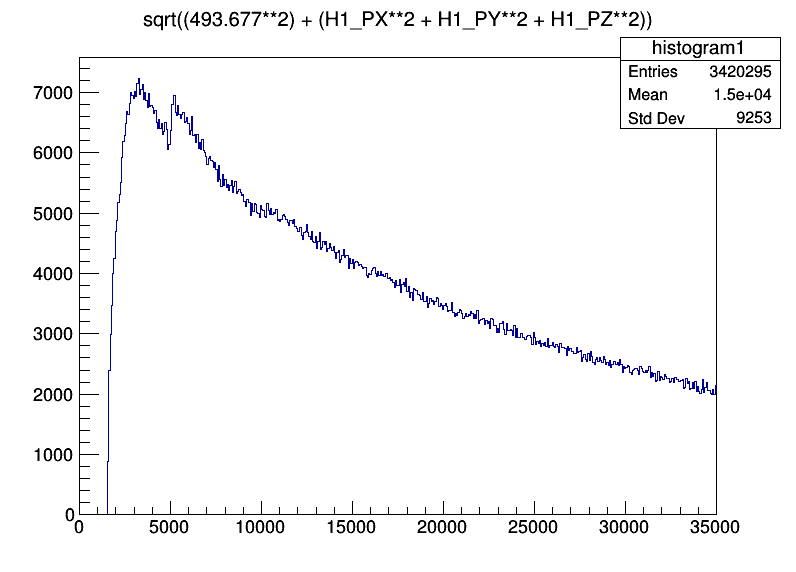

In [84]:
#let's make a function to find the energy of a Kaon, if you add in the total momentum found in the previous steps - you should be able to do so reasonably easily

#we know momentum = m.v
#energy^2 = m^2.c^4 + p^2.c^2
#mass of Kaon = 493.677

def tot_energy_daughter(daughter):
  energy = "sqrt((493.677**2) + ({}_PX**2 + {}_PY**2 + {}_PZ**2))".format(daughter, daughter, daughter)
  return energy

tree.Draw(tot_energy_daughter("H1") + ">>histogram1(500,0,35000)")
histogram1 = ROOT.gDirectory.Get("histogram1")
#Show me the canvas
c.Draw()


We have now completed the initial steps and begun to work through what we need to with the data. This workflow is divided into 4 stages, just for easier viewing and comprehension.

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>


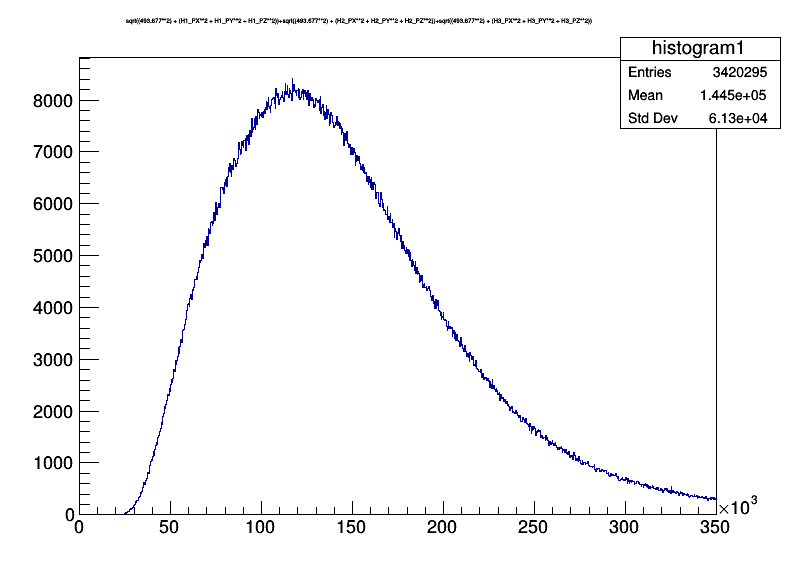

In [86]:
#Calculate the energy of the B meson, using the conservation of energy - just combine the energies to give a total

tree.Draw(tot_energy_daughter("H1") + "+" + tot_energy_daughter("H2") + "+" + tot_energy_daughter("H3") + ">>histogram1(1000,0,350000)")
histogram1 = ROOT.gDirectory.Get("histogram1")
#Show me the canvas
c.Draw()


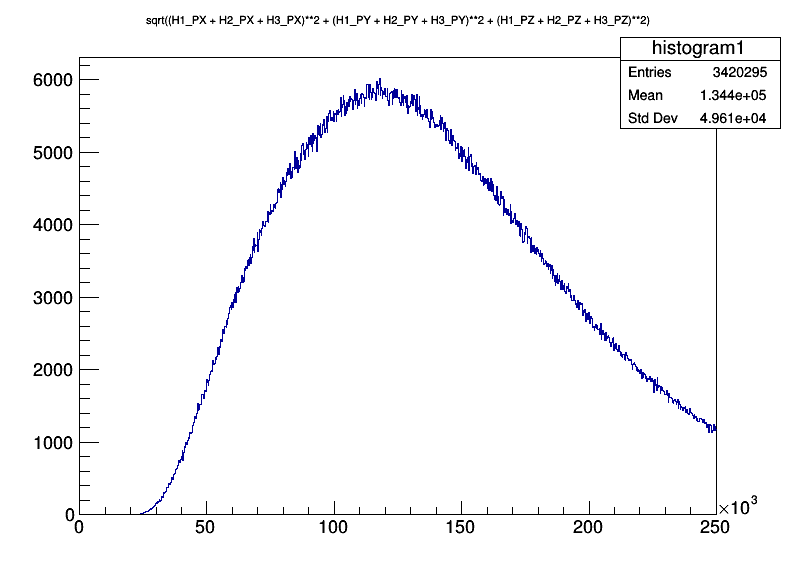

In [91]:
#Calculate the momentum of the B meson. To do this, you need to first combine all the x momenta of the daughters,
#to get a total x momentum of the mother; then you can combine your three momenta into total momentum

tree.Draw("sqrt((H1_PX + H2_PX + H3_PX)**2 + (H1_PY + H2_PY + H3_PY)**2 + (H1_PZ + H2_PZ + H3_PZ)**2)>>histogram1(1000,0,250000)")
histogram1 = ROOT.gDirectory.Get("histogram1")
#Show me the canvas
c.Draw()

Having found our momentum and energy, we can use these quantities to find our experimental mass (not the theoretical mass as we used earlier for the Kaon calculations).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

In [0]:
#Use the energy of the B meson and momentum of the B meson as inputs and
#calculate the mass of the B meson (Found by analysis of the daughter products)

def mother_mass():
  a = "sqrt((" + tot_energy_daughter("H1") + "+" + tot_energy_daughter("H2") + "+" + tot_energy_daughter("H3") + ")**2 - ((H1_PX + H2_PX + H3_PX)**2 + (H1_PY + H2_PY + H3_PY)**2 + (H1_PZ + H2_PZ + H3_PZ)**2))"
  print(a)
  return a


sqrt((sqrt((493.677**2) + (H1_PX**2 + H1_PY**2 + H1_PZ**2))+sqrt((493.677**2) + (H2_PX**2 + H2_PY**2 + H2_PZ**2))+sqrt((493.677**2) + (H3_PX**2 + H3_PY**2 + H3_PZ**2)))**2 - ((H1_PX + H2_PX + H3_PX)**2 + (H1_PY + H2_PY + H3_PY)**2 + (H1_PZ + H2_PZ + H3_PZ)**2))


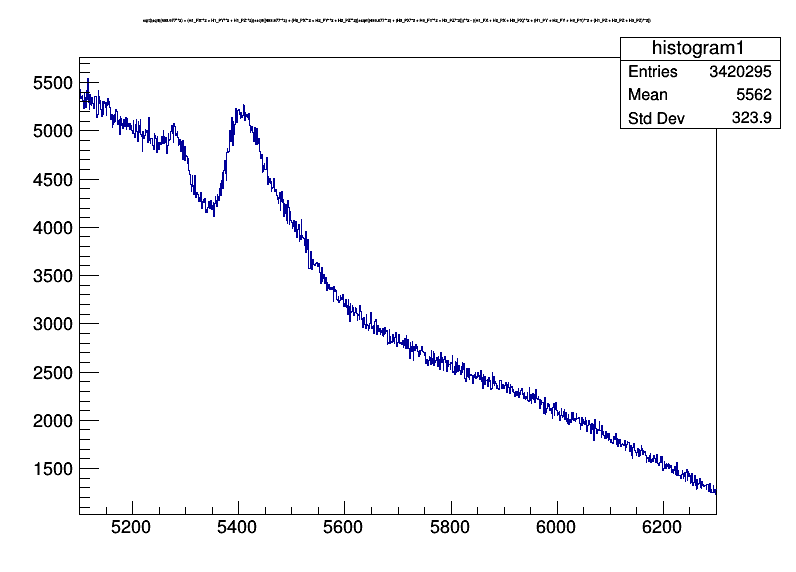

In [143]:
#Now plot a histogram of the range of masses of the B meson.
#Does this match what we would expect from theory?

tree.Draw(mother_mass() + ">>histogram1(1000,5100,6300)")
#Show me the canvas
c.Draw()

We know that some of our particles are the B<sup>+</sup> and some are the B<sup>-</sup> particle. There will also be some particles in our system that are not coming from a genuine B<sup>+/-</sup> or are a B<sup>+/-</sup> but are not constructed from Kaons.

We have some tools available to help:-



*   During detection, software attributes the probability of a particle being a Kaon or a Pion (in the ```H1_ProbK``` or ```H1_ProbPi``` variable)
*   The detector also knows if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
*   The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex $\chi^2$ (this is the variable ```B_VertexChi2```). This is the statistical measure that determines how well we found a single point to be the source of all three particles.

In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have *any muons* in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


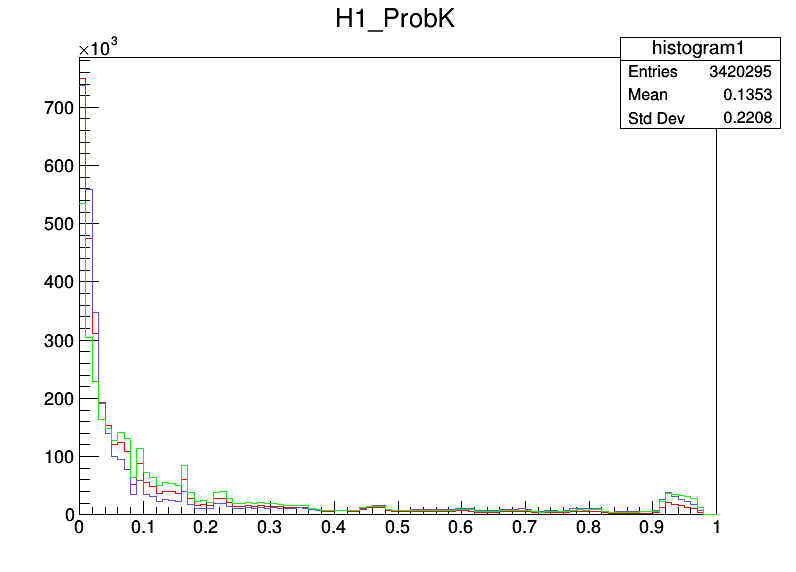

In [128]:
#Make plots of H1/H2/H3 _ProbK on one plot

c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#This string (below) is the total momentum of the H1 particle
tree.Draw("H1_ProbK>>histogram1(100,0,1)")
tree.Draw("H2_ProbK>>histogram2(100,0,1)")
tree.Draw("H3_ProbK>>histogram3(100,0,1)")
histogram1 = ROOT.gDirectory.Get("histogram1")
histogram2 = ROOT.gDirectory.Get("histogram2")
histogram3 = ROOT.gDirectory.Get("histogram3")
histogram1.SetLineColor(2) #red
histogram2.SetLineColor(9)
histogram3.SetLineColor(3) #green
histogram1.Draw()
histogram2.Draw("same")
histogram3.Draw("same")
#Show me the canvas
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


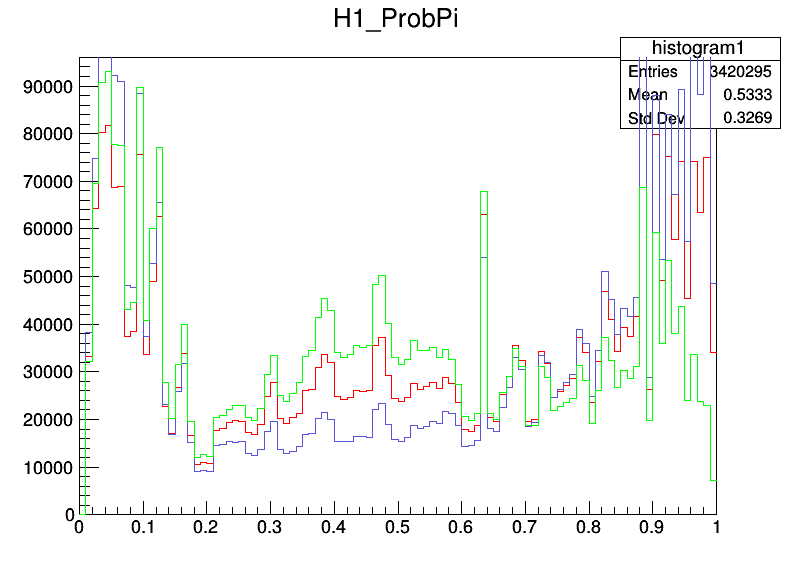

In [136]:
#Make plots of H1/H2/H3 _ProbPi on one plot

c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#This string (below) is the total momentum of the H1 particle
tree.Draw("H1_ProbPi>>histogram1(100,0,1)")
tree.Draw("H2_ProbPi>>histogram2(100,0,1)")
tree.Draw("H3_ProbPi>>histogram3(100,0,1)")
histogram1 = ROOT.gDirectory.Get("histogram1")
histogram2 = ROOT.gDirectory.Get("histogram2")
histogram3 = ROOT.gDirectory.Get("histogram3")
histogram1.SetLineColor(2) #red
histogram2.SetLineColor(9)
histogram3.SetLineColor(3) #green
histogram1.Draw()
histogram2.Draw("same")
histogram3.Draw("same")
#Show me the canvas
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


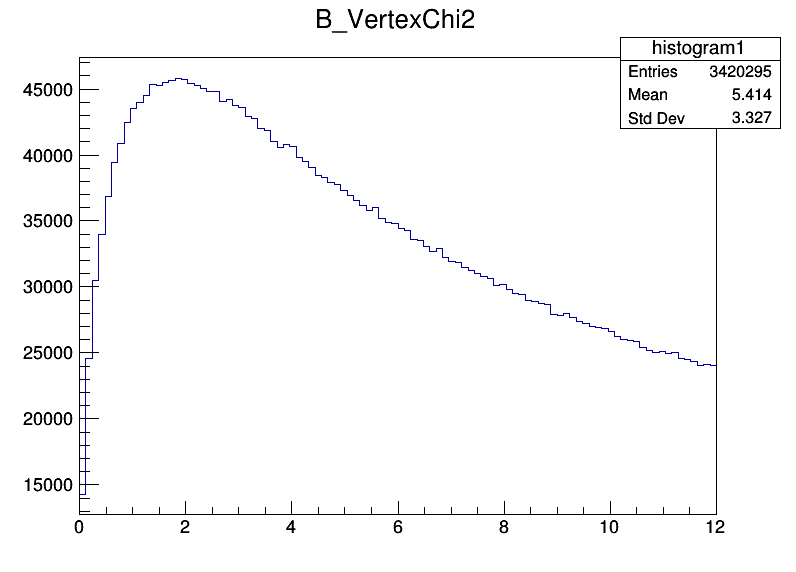

In [108]:
#For all our particles, make a plot of the B_VertexChi2

c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
tree.Draw("B_VertexChi2>>histogram1(100,0,12)")
histogram1 = ROOT.gDirectory.Get("histogram1")
c.Draw()

Using these plots, we can now make a preselection string. This is a text string that looks like 

In [0]:
#This example is for each daughter particle to have a Probability of being a Pion being more than 90% and H1 to not be a muon
#This is not a good choice of selection - you should make your own :)

selection = "H1_ProbK>0.9&H2_ProbK>0.9&H3_ProbK>0.9&H1_ProbPi<0.2&H2_ProbPi<0.2&H3_ProbPi<0.2&!H1_isMuon&!H2_isMuon&!H3_isMuon&B_VertexChi2<2"

In [0]:
#To apply the selection - we can use the copytree command:

CutTree=tree.CopyTree(selection)

#So now we take our data in tree and apply selection to it (so only events which comply with those rules are kept) and put the new data in CutTree

sqrt((sqrt((493.677**2) + (H1_PX**2 + H1_PY**2 + H1_PZ**2))+sqrt((493.677**2) + (H2_PX**2 + H2_PY**2 + H2_PZ**2))+sqrt((493.677**2) + (H3_PX**2 + H3_PY**2 + H3_PZ**2)))**2 - ((H1_PX + H2_PX + H3_PX)**2 + (H1_PY + H2_PY + H3_PY)**2 + (H1_PZ + H2_PZ + H3_PZ)**2))


Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


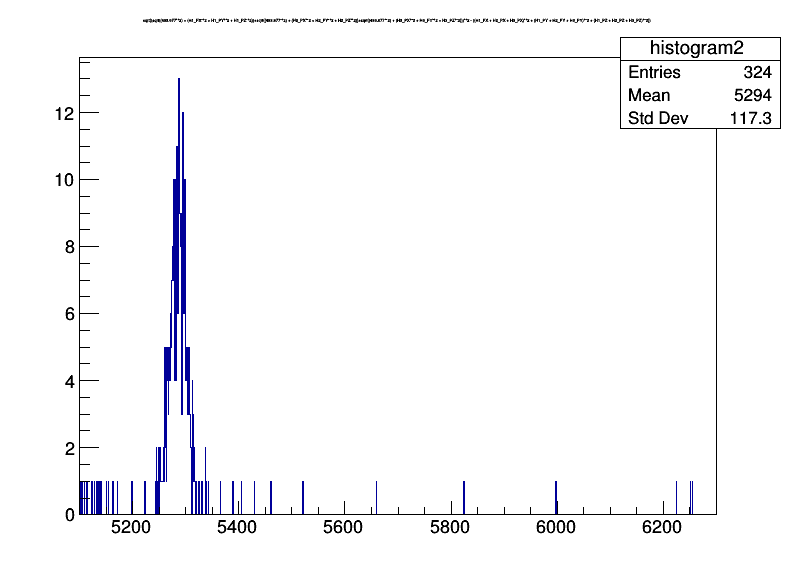

In [159]:
#Now as a good check, we should see the effect of applying our cuts.
#On one histogram, plot the B meson mass, from both the tree (pre-cuts) and the CutTree (post-cuts)
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)

tree.Draw(mother_mass() + ">>histogram1(1000,5100,6300)")
CutTree.Draw(mother_mass() + ">>histogram2(1000,5100,6300)")

histogram1 = ROOT.gDirectory.Get("histogram1")
histogram2 = ROOT.gDirectory.Get("histogram2")
histogram1.SetLineColor(2) #red
histogram2.SetLineColor(9)
histogram1.Draw()
histogram2.Draw("same")
Show me the canvas
c.Draw()
#What do you notice about your histogram now?

#How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

In [72]:
#First we define our physical measurement we want to fit using the RooRealVar
# variable=ROOT.RooRealVar =("Variable from Python", "Nickname",Min, Max, Units)
mass= ROOT.RooRealVar=("B_Mass", "Mass", 5200, 5300, "MeV/C^{2}")

#The remainder of the variables we need to pass into our model. E.g. for a gaussian, we need a mean and a width parameter to vary
#For these RooRealVar's we add three numbers, a "starting value" and min/max values

gauss_mean=ROOT.RooRealVar("gauss_mean","Mean",5270,5220,5300)
gauss_width=ROOT.RooRealVar("gauss_width","Width",3,0,60)

#Now we have enough to make our Model for the signal:

Gauss=ROOT.RooGaussian("Gaussian Signal","Gauss",mass,gauss_mean,gauss_width)

#We also need a background, so let's use a (simple) exponential:

exponent=ROOT.RooRealVar("exponent", "C", -0.02, -2, +2)

#Define the  model for the background:

Bkgnd=ROOT.RooExponential("Exponential Background","Bkgnd",mass,exponent)

#Now we need to combine these two functions into a single PDF (probability density function)
#and we need to add a scaling factor to fit what ratio of the two are used:

sig_frac=ROOT.RooRealVar("Signal Fraction","sigfrac", 0.5, 0, 1)

model=ROOT.RooAddPdf("Full Model","model",ROOT.RooArgList(Gauss,Bkgnd),sig_frac)

TypeError: ignored

In [0]:
#Put our data set into a RooDataSet structure

data_to_fit=ROOT.RooDataSet("Data Set","data_to_fit", CutTree, mass)

#Then we can do the fitting:

model.fitTo(data_to_fit)

#if everything went well, you will see the outputs of RooFit below

In [0]:
#Now to plot it all
c1=ROOT.TCanvas("c1","c1")
frame=mass.frame()
data_to_fit.plotOn(frame)
model.plotOn(frame, ROOT.RooFit.Components("Gauss"),ROOT.RooFit.LineColor(8),ROOT.RooFit.LineStyle(2))
model.plotOn(frame, ROOT.RooFit.Components("Bkgnd"),ROOT.RooFit.LineColor(46),ROOT.RooFit.LineStyle(2))
model.plotOn(frame)
frame.Draw()
c1.Update()

Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do all):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

In [0]:
#Build your own models here

So how good was the fit, and how many events do you have?

We can use the ```.getValV()``` function on our signal and background components, e.g. ```signal_yield=Gauss.getValV()```

To find the error (on this number) we can use ```.getError()```

Neither of these measures would tell us if this was a good fit or not. Normally we use a $\chi^2$ test to do so - this is built into the image we made (so we can do ```frame.chiSquare()``` to get this data)

For each model you made, print the signal and background yields (with errors) and report the $\chi^2$